In [1]:
%run ~/dev/pydev/Jupyter/ml/settings.ipynb

In [222]:
#Minimizing f = x**2 + y**2
#Or Zero-order 
cost = lambda x, y: 2.*x + 2.*y
f = lambda x, y : x**2 +y**2
def coordinate_search(cost_function, initial_w, N_coordinates=1, maxmum_steps=10, step_length=1., diminishing=False):
    w0 = initial_w
    apply_cost = lambda w: cost_function(*[arg for arg in w])
    cost = apply_cost(w0)
    #
    w_hist=[w0]
    cost_hist=[cost]
    for n in range(1, maxmum_steps+1):
        if diminishing is True:
            alpha = step_length/n
        else :
            alpha = step_length
        diff = alpha*step_length
        ws = [[w0[n] + diff, w0[n] - diff] for n in range(N_coordinates)]
        candidates = np.array(np.meshgrid(*ws), dtype=float).T.reshape(-1, N_coordinates)
        x = [candidates[:,n] for n in range(N_coordinates)]
        min_direction_idx = np.argmin(np.abs(list(map(cost_function, *x))))
        w0 = candidates[min_direction_idx]
        #
        w_hist.append(w0)
        cost_hist.append(apply_cost(w0))
        #
    return w0,w_hist,cost_hist

In [247]:
Nit=30
w0, w_hist, cost_hist = coordinate_search(f, [5,2], 2, Nit, .5, False)

Text(0, 0.5, 'Cost')

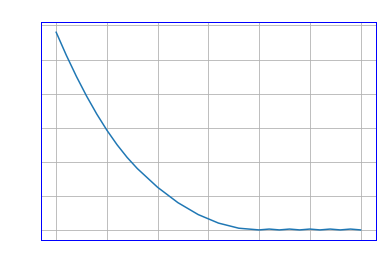

In [248]:
plt.plot(list(np.arange(Nit+1)), cost_hist)
plt.grid()
# Legend the plot
plt.title("Ordinate Search algorithm", color='white')
plt.xlabel("N iteration")
plt.ylabel("Cost")

In [239]:
w0

array([-0.12, -0.56])

In [240]:
#Iterate only one coordinate at one time 
def coordinate_descent(cost_function, initial_w, N_coordinates=1, maxmum_steps=10, step_length=1., diminishing=False):
    w0 = initial_w
    apply_cost = lambda w: cost_function(*[arg for arg in w])
    cost = apply_cost(w0)
    #
    w_hist=[w0]
    cost_hist=[cost]
    for n in range(1, maxmum_steps+1):
        if diminishing is True:
            alpha = step_length/n
        else :
            alpha = step_length
        diff = alpha*step_length
        
        for N in range(N_coordinates):
            ws = [w0[N] + diff, w0[N] - diff]
            candidates = []
            for new_w in ws:
                c = w0.copy()
                c[N] = new_w
                candidates.append(c)
            candidates = np.array(candidates)
            x = [candidates[:,n] for n in range(N_coordinates)]
            min_direction_idx = np.argmin(np.abs(list(map(cost_function, *x))))
            w0 = candidates[min_direction_idx]
            #
            w_hist.append(w0)
            cost_hist.append(apply_cost(w0))
            #
            
    return w0,w_hist,cost_hist

In [245]:
Nit=30
w0, w_hist, cost_hist = coordinate_descent(f, [5,2], 2, Nit, .5, False)

Text(0, 0.5, 'Cost')

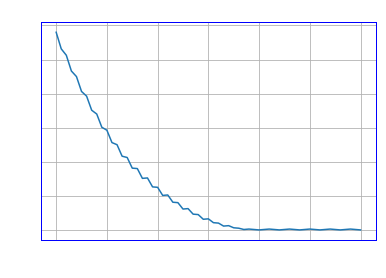

In [246]:
plt.plot(list(np.arange(Nit*2+1)), cost_hist)
plt.grid()
# Legend the plot
plt.title("Ordinate Search algorithm", color='white')
plt.xlabel("N iteration")
plt.ylabel("Cost")